In [1]:
%matplotlib inline

from numpy import *
import matplotlib.pyplot as plt

points = genfromtxt("./data/income.csv", delimiter=",")
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

### Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Esse exemplo foi trabalhado em sala de aula em várias ocasiões. Os itens a seguir devem ser respondidos usando esses dados.

In [2]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[0, 1]
        totalError += (y - (m * x + b)) **2
    return totalError/float(len(points))

def step_gradient(current_b , current_m, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m * x) + current_b))
    new_b = current_b - (learningRate * b_gradient)
    new_m = current_m - (learningRate * m_gradient)
    return [new_b, new_m]
 
def gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations):
    b = initial_b
    m = initial_m
    x, y = [], []
    
    for i in range(num_iterations):
        b, m = step_gradient(b , m, array(points), learning_rate)
    return [b, m]

def run(gradient_function):
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_function(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
run(gradient_descent_runner)

Starting gradient descent at b = 0, m = 0, error = 710.6936852813855
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 779.3340688681667


### 2 - Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente. Gere um plot mostrando o RSS por interação.

Starting gradient descent at b = 0, m = 0, error = 710.6936852813855
Running...
RSS = 569.2857242729146
RSS = 450.73922168428186
RSS = 352.22132599871213
RSS = 271.21996767408876
RSS = 205.50891789110707
RSS = 153.11658409329166
RSS = 112.29814628656816
RSS = 81.51067984767897
RSS = 59.39094797455454
RSS = 44.73558036012786
RSS = 36.48338459779134
RSS = 33.69956360202756
RSS = 35.561636283092305
RSS = 41.346880146548536
RSS = 50.42113366234327
RSS = 62.22881340149526
RSS = 76.28401628386628
RSS = 92.16259100813066
RSS = 109.4950750151538
RSS = 127.96040432086696
RSS = 147.28031338069056
RSS = 167.21435093659804
RSS = 187.55544565918942
RSS = 208.1259624283227
RSS = 228.7741963843714
RSS = 249.37125750622403
RSS = 269.80830350173636
RSS = 289.99408329410414
RSS = 309.85275740959366
RSS = 329.3219651684007
RSS = 348.3511117959663
RSS = 366.8998514470247
RSS = 384.93674470491567
RSS = 402.4380714163935
RSS = 419.3867817761003
RSS = 435.77157041073156
RSS = 451.58605985377926
RSS = 466.828

RSS = 778.8698522276502
RSS = 778.87081032126
RSS = 778.8717684191868
RSS = 778.8727265214297
RSS = 778.8736846279888
RSS = 778.8746427388643
RSS = 778.8756008540557
RSS = 778.8765589735629
RSS = 778.8775170973857
RSS = 778.8784752255237
RSS = 778.8794333579775
RSS = 778.8803914947463
RSS = 778.8813496358302
RSS = 778.8823077812285
RSS = 778.8832659309415
RSS = 778.8842240849688
RSS = 778.8851822433102
RSS = 778.8861404059655
RSS = 778.8870985729344
RSS = 778.8880567442169
RSS = 778.8890149198124
RSS = 778.8899730997207
RSS = 778.8909312839419
RSS = 778.8918894724759
RSS = 778.8928476653217
RSS = 778.89380586248
RSS = 778.8947640639497
RSS = 778.8957222697312
RSS = 778.8966804798239
RSS = 778.8976386942273
RSS = 778.8985969129419
RSS = 778.8995551359665
RSS = 778.9005133633017
RSS = 778.9014715949462
RSS = 778.9024298309008
RSS = 778.9033880711651
RSS = 778.9043463157383
RSS = 778.9053045646201
RSS = 778.9062628178108
RSS = 778.9072210753104
RSS = 778.9081793371172
RSS = 778.9091376032

After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 779.3340688681667


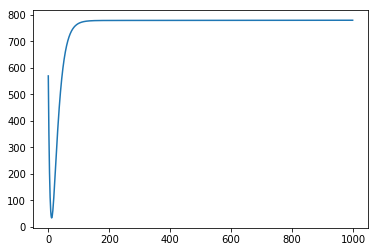

In [3]:
def gradient_descent_runner_plot(points, initial_b, initial_m, learning_rate, num_iterations):
    b = initial_b
    m = initial_m
    x, y = [], []
    
    for i in range(num_iterations):
        b, m = step_gradient(b , m, array(points), learning_rate)
        rss = compute_error_for_line_given_points(b, m, points)
        print("RSS = {0}".format(rss))
        x.append(i)
        y.append(rss)
        
    plt.plot(x, y)
    return [b, m]
    
run(gradient_descent_runner_plot)

### 3 - O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações e um learning_rate (tamanho do passo do gradiente) de 0.001? Por que você acha que isso acontece?

Starting gradient descent at b = 0, m = 0, error = 710.6936852813855
Running...
RSS = 41.214298939104346
RSS = 289.29835650662824
RSS = 521.4746294708066
RSS = 653.3868656617034
RSS = 719.4303636727057
RSS = 750.9682501121114
RSS = 765.7328879782582
RSS = 772.5867503649522
RSS = 775.7583934521141
RSS = 777.2261669127965
RSS = 777.9076262972928
RSS = 778.2266582112405
RSS = 778.378734777793
RSS = 778.4539220418873
RSS = 778.4937032161956
RSS = 778.5171815732123
RSS = 778.5331535787305
RSS = 778.5456695829361
RSS = 778.5565945457512
RSS = 778.5667871701753
RSS = 778.5766428362937
RSS = 778.586343592006
RSS = 778.5959732588781
RSS = 778.605570431349
RSS = 778.6151528795855
RSS = 778.6247287854778
RSS = 778.6343019161136
RSS = 778.6438740058396
RSS = 778.6534458530533
RSS = 778.6630178252063
RSS = 778.6725900913251
RSS = 778.6821627290764
RSS = 778.6917357740591
RSS = 778.7013092425034
RSS = 778.7108831417215
RSS = 778.7204574749202
RSS = 778.7300322434146
RSS = 778.7396074476495
RSS = 778

RSS = 787.8154593942782
RSS = 787.8253219489287
RSS = 787.835184693325
RSS = 787.845047627234
RSS = 787.8549107504242
RSS = 787.8647740626628
RSS = 787.8746375637176
RSS = 787.8845012533562
RSS = 787.8943651313458
RSS = 787.9042291974552
RSS = 787.9140934514512
RSS = 787.9239578931029
RSS = 787.9338225221778
RSS = 787.9436873384437
RSS = 787.9535523416695
RSS = 787.9634175316227
RSS = 787.9732829080714
RSS = 787.9831484707848
RSS = 787.9930142195309
RSS = 788.0028801540781
RSS = 788.0127462741949
RSS = 788.0226125796497
RSS = 788.0324790702118
RSS = 788.0423457456495
RSS = 788.0522126057313
RSS = 788.0620796502263
RSS = 788.0719468789036
RSS = 788.0818142915324
RSS = 788.0916818878812
RSS = 788.1015496677186
RSS = 788.111417630815
After 1000 iterations b = -3.403476317589064, m = 3.4539297809959373, error = 788.111417630815


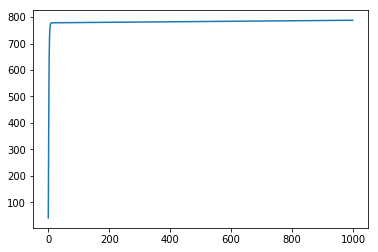

In [4]:
def run(gradient_function):
    learning_rate = 0.001
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_function(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
run(gradient_descent_runner_plot)

#### Learning rate, em termos populares, é a taxa de ajuste do chute do modelo. Quando passamos de 0.0001 para 0.001, estamos afetando a magnitude do chute de forma com que a precisão se perca e o erro aumente com as iterações pois o modelo, quando chega perto de convergir, é alimentado com um chute que o distancia da meta.

### 4 - Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

In [5]:
def run(gradient_function):
    learning_rate = 0.001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 100000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_function(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
run(gradient_descent_runner)

Starting gradient descent at b = 0, m = 0, error = 710.6936852813855
Running...
After 100000 iterations b = -39.44332204413956, m = 5.599308181295304, error = 953.8408596666026


### 5 - O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de tolerância que é comparado ao tamanho do gradiente (como no algoritmo dos slides apresentados em sala). 

In [6]:
def gradient_descent_runner_threshold(points, initial_b, initial_m, learning_rate, threshold):
    b = initial_b
    m = initial_m
    x, y = [], []
    
    o_rss = inf
    error_d = inf
    i = 0
    while error_d >= threshold:
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss = absolute(compute_error_for_line_given_points(b, m, points))
        error_d = absolute(o_rss - rss)
        o_rss = rss
        i += 1
        x.append(i)
        y.append(rss)
        
    plt.plot(x, y)
    return [b, m, i]

def run(threshold):
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m, i] = gradient_descent_runner_threshold(points, initial_b, initial_m, learning_rate, threshold)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(i, b, m, compute_error_for_line_given_points(b, m, points)))


### 6 - Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

Starting gradient descent at b = 0, m = 0, error = 710.6936852813855
Running...
After 101320 iterations b = -39.44366828402732, m = 5.599328792248585, error = 953.8430473440927
CPU times: user 4.5 s, sys: 242 ms, total: 4.74 s
Wall time: 4.41 s


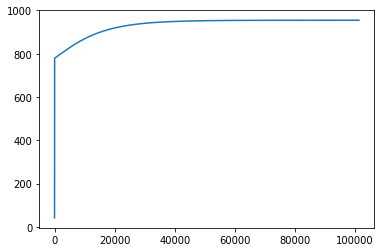

In [7]:
learning_rate = 0.001
threshold = 0.00000155555555555
%time run(threshold)

### 7 - Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

In [8]:
def closed_form(initial_b, initial_m):
    b = initial_b
    m = initial_m
    xs = [row[0] for row in points]
    ys = [row[1] for row in points]
    
    x_mean = mean(xs)
    y_mean = mean(ys)
    
    def var(values, mean):
        return sum([(x-mean)**2 for x in values])
    
    def cov(x, x_mean, y, y_mean):
        cov = 0.0
        for i in range(len(x)):
            cov += (x[i] - x_mean) * (y[i] - y_mean)
        return cov
    
    m = cov(xs, x_mean, ys, y_mean)/var(xs, x_mean)
    b = y_mean - m*x_mean
    
    return [b, m]
    

def closed_gradient_dr_threshold(points, initial_b, initial_m):
    b = initial_b
    m = initial_m
    x, y = [], []
    
    o_rss = inf
    error_d = inf
    i = 0
    while error_d >= threshold:
        b, m = closed_form(b, m)
        rss = absolute(compute_error_for_line_given_points(b, m, points))
        error_d = absolute(o_rss - rss)
        o_rss = rss
        i += 1
        
    return [b, m, i]

def run():
    print ("Running...")
    [b, m, i] = closed_gradient_dr_threshold(points,initial_b, initial_m)
    print("iterations = {3}, b = {0}, m = {1}, error = {2}".format(b, m, compute_error_for_line_given_points(b, m, points), i))

%time run()

Running...
iterations = 2, b = -39.446256679096194, m = 5.59948287411992, error = 953.8594021874682
CPU times: user 492 µs, sys: 0 ns, total: 492 µs
Wall time: 418 µs


#### Como podemos ver, o tempo de execução da fórmula fechada é menor. Isto se deve ao dataset ser pequeno. Num conjunto de dados maior, provavelmente o tempo computacional seria maior, podendo nem sequer a achar uma solução. Desta forma, a estratégia de 